In [333]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
from ast import literal_eval
import pandas as pd

In [334]:
data = pd.read_csv("n_Data.csv", sep=",")
data.head(5)

,type 0,type 1,type 2,type 3,type 4,type 5,type 6,type 7,type 8,type 9,...,type 30,type 31,type 32,type 33,type 34,type 35,type 36,type 37,type 38,type 39
0,13,6,4,9,8,11,9,18,18,11,...,171,170,184,182,198,175,183,208,212,227
1,14,12,18,14,35,26,21,34,37,21,...,39,28,45,69,52,65,67,74,90,83
2,7,8,38,10,26,32,14,15,13,25,...,63,66,63,64,61,57,72,80,81,86
3,5,7,9,9,4,5,10,12,17,20,...,15,31,32,41,25,27,31,49,65,93
4,26,3,21,22,22,32,7,16,20,29,...,51,50,62,58,54,55,96,137,127,163


In [335]:
seq = 20       # 예측할 seq 수

type = ["type %d"%i for i in range(data.shape[1])]

type_x = ["type %d"%i for i in range(data.shape[1]-seq)]
type_y = ["type %d"%i for i in range(data.shape[1]-seq,data.shape[1])]

In [336]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scale_cols = type
df_scaled = scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

In [337]:
split_rate = 0.8
sr = int(len(df_scaled) * split_rate)

train = df_scaled[:sr]
test = df_scaled[sr:]

In [338]:
def make_dataset(data, label, window_size = 40-seq):
    feature_list = []
    label_list = []
    
    for i in range(data.shape[0]):
        feature_list.append(np.array(data.iloc[i]))
        label_list.append(np.array(label.iloc[i]))
    
    return np.array(feature_list), np.array(label_list)

In [339]:
feature_cols = type_x
label_cols = type_y

train_feature = train[feature_cols]
train_label = train[label_cols]


train_feature, train_label = make_dataset(train_feature, train_label, 40-seq)

train_feature = train_feature.reshape(train_feature.shape[0],train_feature.shape[1],1)
train_label = train_label.reshape(train_label.shape[0],train_label.shape[1],1)


from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((320, 20, 1), (80, 20, 1))

In [340]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [341]:
test_feature, test_label = make_dataset(test_feature,test_label)

test_feature = test_feature.reshape(test_feature.shape[0],test_feature.shape[1],1)
test_label = test_label.reshape(test_label.shape[0],test_label.shape[1],1)

test_feature.shape, test_label.shape

((100, 20, 1), (100, 20, 1))

In [342]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(150,
              input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
              )
model.add(Dense(seq))

In [343]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 150)               91200     
_________________________________________________________________
dense_14 (Dense)             (None, 20)                3020      
Total params: 94,220
Trainable params: 94,220
Non-trainable params: 0
_________________________________________________________________


In [344]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train,
                   epochs=100,
                   batch_size=20,
                   validation_data=(x_valid, y_valid)
                   )

Epoch 1/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0753 - val_loss: 0.0924
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0560 - val_loss: 0.0474
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0426 - val_loss: 0.0402
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0373
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0365 - val_loss: 0.0355
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0339 - val_loss: 0.0349
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0326 - val_loss: 0.0327
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0290 - val_loss: 0.0292
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.0302
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0259 - val_loss: 0.0258
Epoch 11

16/16 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 84/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0105
Epoch 85/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 86/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0127
Epoch 87/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 88/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0099
Epoch 89/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 90/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 91/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0153
Epoch 92/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0140
Epoch 93/100


In [345]:
pred = model.predict(test_feature)

In [346]:
print(test_feature.shape)

test_feature = test_feature.reshape(test_feature.shape[0],test_feature.shape[1])

test_label = test_label.reshape(test_label.shape[0],test_label.shape[1])

print(test_feature.shape)

print(test_label.shape)

print(pred.shape)

(100, 20, 1)
(100, 20)
(100, 20)
(100, 20)


In [347]:
test_d = pd.DataFrame(test_feature)
pred_d = pd.DataFrame(pred)

In [348]:
result = pd.concat([test_d,pred_d],axis=1)

In [349]:
result

,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,0.300,0.121212,0.028571,0.193548,0.157895,0.188679,0.125000,0.297872,0.265625,0.127273,...,0.616490,0.640950,0.651138,0.727328,0.736348,0.715248,0.700122,0.820780,0.786591,0.805728
1,0.325,0.303030,0.428571,0.354839,0.868421,0.471698,0.339286,0.638298,0.562500,0.309091,...,0.204160,0.226596,0.253827,0.289717,0.247481,0.301091,0.335429,0.381786,0.363564,0.413395
2,0.150,0.181818,1.000000,0.225806,0.631579,0.584906,0.214286,0.234043,0.187500,0.381818,...,0.151158,0.165679,0.185350,0.204440,0.187958,0.203944,0.231858,0.263246,0.253680,0.279778
3,0.100,0.151515,0.171429,0.193548,0.052632,0.075472,0.142857,0.170213,0.250000,0.290909,...,0.068156,0.095345,0.105358,0.111325,0.111101,0.127590,0.133391,0.148217,0.133231,0.153555
4,0.625,0.030303,0.514286,0.612903,0.526316,0.584906,0.089286,0.255319,0.296875,0.454545,...,0.130201,0.143015,0.170534,0.185704,0.144783,0.170773,0.211040,0.241808,0.218609,0.254440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.625,0.818182,0.828571,0.709677,0.421053,0.471698,0.214286,0.489362,0.296875,0.454545,...,0.117978,0.118239,0.134497,0.130880,0.103274,0.135872,0.125005,0.141955,0.125502,0.125447
96,0.300,0.818182,0.742857,0.612903,0.157895,0.132075,0.250000,0.319149,0.281250,0.400000,...,0.047070,0.035921,0.050925,0.030662,0.035961,0.035208,0.023574,0.035846,0.047157,0.022263
97,0.425,0.151515,0.314286,0.451613,0.684211,0.283019,0.321429,0.382979,0.281250,0.200000,...,0.086668,0.094376,0.112770,0.125213,0.097602,0.120120,0.135529,0.155102,0.150984,0.165231
98,0.975,0.545455,0.514286,0.774194,0.368421,0.452830,0.428571,0.297872,0.375000,0.127273,...,0.068250,0.060153,0.066742,0.045480,0.030550,0.073814,0.039428,0.039155,0.041824,0.003166


In [350]:
actual = scaler.inverse_transform(df_scaled)
prediction = scaler.inverse_transform(result)

In [351]:
prediction[0]-actual[0]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       -64.96732885, -36.47093439, -49.62321353, -46.82424414,
        -1.8263036 , -71.28379285, -40.79398251,   4.67440605,
         1.6852476 ,   4.6142385 ,  -9.94568598,  -7.12145418,
       -15.00647092,   2.83210492,  -4.75846362,   2.80527574,
        -8.97070599,  -6.55037814,  -2.33996201,  -6.8707146 ])

In [352]:
mse = 0.0
for i in range(len(prediction)):
    mse = mse +  sum((prediction[i]-actual[i]) ** 2)
mse = mse / len(prediction)
rmse = mse ** 0.5
print(rmse)

90.19966235047467


In [353]:
4000

4000

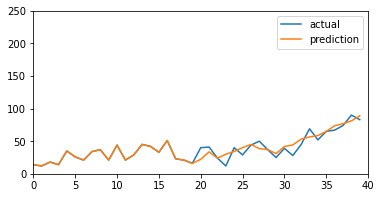

In [292]:
N = 1
plt.figure(figsize=(6,3))
plt.plot(actual[N] ,label='actual')
plt.plot(prediction[N], label='prediction')
plt.axis([0,40,0,250])
plt.legend()
plt.show()

In [164]:
from scipy.ndimage import gaussian_filter1d


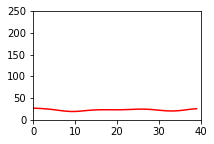

In [186]:
y_s1 = gaussian_filter1d(actual[0], sigma=3)
y_s2 = gaussian_filter1d(actual[7], sigma=3)
y_s3 = gaussian_filter1d(actual[51], sigma=3)
y_s4 = gaussian_filter1d(actual[89], sigma=3)

plt.figure(figsize=(3,2))
plt.plot(y_s4, color='red')
# plt.plot(actual[20])
plt.axis([0,40,0,250])
plt.show()

In [174]:
actual[0]

array([ 13.,   6.,   4.,   9.,   8.,  11.,   9.,  18.,  18.,  11.,   6.,
        10.,  26.,  10.,  26.,  44.,  78.,  74., 119., 135., 190., 164.,
       183., 179., 139., 194., 164., 159., 181., 181., 171., 170., 184.,
       182., 198., 175., 183., 208., 212., 227.])

In [177]:
# plt.subplot(2,2,1)
# plt.plot(y_s1, color='red')
# plt.xticks([0,20,40])
# plt.yticks([0,50,100,150,200,250])
# plt.show()

# plt.subplot(2,2,2)
# plt.xticks([0,40])
# plt.yticks([0,50,100,150,200,250])
# plt.plot(y_s2, color='red')

# plt.subplot(2,2,3)
# plt.xticks([0,40])
# plt.yticks([0,50,100,150,200,250])
# plt.plot(y_s3, color='red')

# plt.subplot(2,2,4)
# plt.xticks([0,20,40])
# plt.yticks([0,50,100,150,200,250])
# plt.plot(y_s4, color='red')

In [178]:
# plt.subplots(2,2,sharex=True,sharey=True)